In [ ]:
from functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC

In [ ]:
#Features - all features for 
cols = ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F', 'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I', 'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH', 'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PA8:VH', 'R3-PM8:V', 'R3-PA9:VH', 'R3-PM9:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PA11:IH', 'R3-PM11:I', 'R3-PA12:IH', 'R3-PM12:I', 'R3:F', 'R3:DF', 'R3-PA:Z', 'R3-PA:ZH', 'R3:S', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PA9:VH', 'R4-PM9:V', 'R4-PA10:IH', 'R4-PM10:I', 'R4-PA11:IH', 'R4-PM11:I', 'R4-PA12:IH', 'R4-PM12:I', 'R4:F', 'R4:DF', 'R4-PA:Z', 'R4-PA:ZH', 'R4:S', 'control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4']

#Importing data for classification using function from fomlads library, see functions.py for documentation
inputs, targets, input_cols, classes = import_for_classification('power_clean.csv', input_cols=cols, target_col='marker')

In [ ]:
#Splitting the data into train and test sets using functions from fomlads library, see functions.py for documentation
N = inputs.shape[0]
train_filter, test_filter = train_and_test_filter(N, 0.1)
#The previous function creates a random filter each time. To ensure reproducibility, the following function is set 
#to use a fixed filter by default, see README for details.
train_inputs, train_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)

In [ ]:
#Two hyperparameters, 3 options for each, 9 combinations
C_range = [1, 10, 100]
gamma_range = [0.01,0.001, 0.0001]

#Grid search with cross validation
#Adapted from fomlads library
#Documentation in functions.py
folds = fold_train_test_filter(train_inputs, num_folds=3)
grid_search_output = grid_search_cross_val_svm(folds, train_inputs, train_targets, C_range=C_range, gamma_range=gamma_range)

In [ ]:
#Makes dictionary to organise and easily plot f1 averages

dct = {}
keys = []
for c in C_range:
    dct[c] = {}
    for g in gamma_range:
        dct[c][g] = []

for c in range(len(grid_search_output)):
    for k in dct.keys():
        for k2 in dct[k]:
            if grid_search_output[c][0] == k and grid_search_output[c][1] == k2:
                dct[k][k2].append(grid_search_output[c][-1])

#The following for loop averages ACROSS FOLDS for the results for each hyperparameter combination
for k1 in dct.keys():
    for k2 in dct[k1]:
        dct[k1][k2] = sum(dct[k1][k2])/3

Text(0.5, 1.0, 'F1 scores for grid search with cross validation for SVM with rbf kernel')

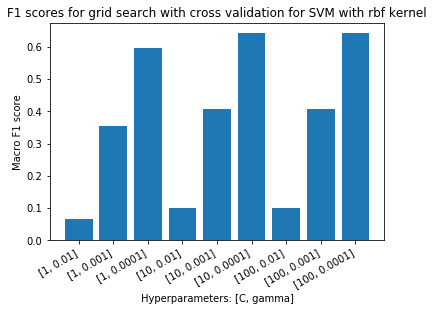

In [11]:
#Note that the following visualisation code is compatible only for the specified hyperparameter ranges
#It will result in an error/erroneous figure if the hyperparameter ranges are changed

xs = [[1, 0.01], [1, 0.001], [1, 0.0001],
      [10, 0.01], [10, 0.001], [10, 0.0001],
      [100, 0.01], [100, 0.001], [100, 0.0001]]
xs_str = []
for x in xs:
    xs_str.append(str(x))
ys = [dct[x[0]][x[1]] for x in xs]
fig, ax = plt.subplots()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.bar(xs_str, ys)
ax.set_xlabel('Hyperparameters: [C, gamma]')
ax.set_ylabel('Macro F1 score')
ax.set_title('F1 scores for grid search with cross validation for SVM with rbf kernel')